In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pyod.models.ecod import ECOD
from pyod.models.lunar import LUNAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [2]:
penl = pd.read_csv(r'C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\pen-local-unsupervised-ad.csv', header = None)

In [3]:
penl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47.0,100.0,27.0,81.0,57.0,37.0,26.0,0.0,0.0,23.0,56.0,53.0,100.0,90.0,40.0,98.0,n
1,0.0,89.0,27.0,100.0,42.0,75.0,29.0,45.0,15.0,15.0,37.0,0.0,69.0,2.0,100.0,6.0,n
2,0.0,57.0,31.0,68.0,72.0,90.0,100.0,100.0,76.0,75.0,50.0,51.0,28.0,25.0,16.0,0.0,n
3,0.0,100.0,7.0,92.0,5.0,68.0,19.0,45.0,86.0,34.0,100.0,45.0,74.0,23.0,67.0,0.0,o
4,0.0,67.0,49.0,83.0,100.0,100.0,81.0,80.0,60.0,60.0,40.0,40.0,33.0,20.0,47.0,0.0,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,17.0,63.0,6.0,20.0,51.0,0.0,95.0,28.0,100.0,72.0,55.0,100.0,0.0,91.0,0.0,52.0,n
6720,0.0,82.0,9.0,59.0,56.0,34.0,41.0,0.0,10.0,30.0,3.0,67.0,42.0,96.0,100.0,100.0,n
6721,100.0,98.0,60.0,100.0,24.0,87.0,3.0,58.0,35.0,51.0,58.0,26.0,36.0,0.0,0.0,5.0,n
6722,59.0,65.0,91.0,100.0,84.0,96.0,72.0,50.0,51.0,8.0,0.0,0.0,45.0,1.0,100.0,0.0,n


In [4]:
shuffled_df = penl.sample(frac=1).reset_index(drop=True)
shuffled_df


df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))



In [5]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.084713,-0.942989,-1.075252,-2.856206,0.028141,-2.368886,1.556886,-0.723232,1.231999,1.527628,-0.115485,2.462625,-2.051160,1.452156,-0.961959,0.196798
1,-0.529635,-2.063642,0.984706,-0.555264,1.333745,1.180434,1.195460,0.928151,0.752978,0.486383,0.228953,-0.625106,-2.365104,-0.978737,1.011282,-0.874631
2,-1.084713,1.003409,-0.426747,-0.800045,1.273019,-1.020144,1.096889,-1.408712,-1.163110,-0.878006,0.175963,0.440897,2.119808,1.366360,-0.445158,1.488007
3,0.229946,1.003409,0.412495,-0.897958,1.333745,1.109447,-1.005951,1.644789,-0.264944,1.384008,0.705868,1.323105,1.267675,-0.664151,-1.055923,-0.874631
4,-1.055498,-0.294189,-0.998957,0.815510,0.149593,0.931981,-0.085959,0.585411,-0.983476,0.235048,-1.546229,-0.808899,-0.302045,-1.035935,1.293173,-0.874631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,-1.084713,-0.825025,0.259906,-2.366644,0.210318,-2.368886,-1.695946,-1.221763,-0.384699,0.306858,1.103297,1.433382,2.074959,1.823940,-0.609595,1.213282
6720,-1.026284,0.826464,-1.075252,-0.849002,-0.184399,0.825502,-1.268806,1.707105,0.244017,1.527628,1.103297,0.146827,0.998580,-0.978737,-1.055923,-0.874631
6721,1.836751,-0.058262,0.717674,0.815510,-0.184399,0.044652,0.636893,-0.442808,-0.474516,-1.165246,-1.546229,-0.625106,-0.974781,0.365404,0.776372,1.213282
6722,-1.084713,0.413591,-0.083420,0.815510,0.301407,0.399583,-0.283100,0.086881,-1.312804,-0.303526,-1.440248,-1.213245,-0.032950,-1.035935,1.293173,-0.819686


In [6]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))
y

,16
0,0
1,0
2,0
3,0
4,0
...,...
6719,0
6720,0
6721,0
6722,0


ECOD

In [7]:
ecod = ECOD()
ecod.fit(df)

ECOD(contamination=0.1, n_jobs=1)

In [8]:
ecod_score = ecod.decision_function(df)

In [9]:
ecod_score

array([20.59518573, 20.88607842, 26.19661282, ..., 24.28930502,
       23.15891133, 25.88948729])

In [10]:
ecod_pred = ecod.predict(df)
ecod_pred

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
ecod_acc = accuracy_score(y, ecod_pred)
ecod_acc

0.8984235574063058

0.5342716711349419


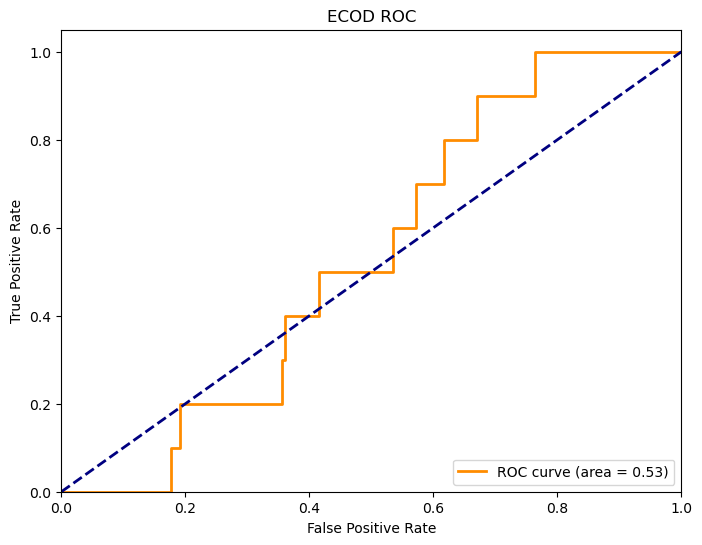

In [12]:
ecod_fpr, ecod_tpr, ecod_thresholds = roc_curve(y, ecod_score)
roc_auc = auc(ecod_fpr, ecod_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(ecod_fpr, ecod_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ECOD ROC')
plt.legend(loc='lower right')
plt.show()

LUNAR

In [13]:
lunar = LUNAR()
lunar.fit(df)

LUNAR(contamination=0.1, epsilon=0.1, lr=0.001, model_type='WEIGHT',
   n_epochs=200, n_neighbours=5, negative_sampling='MIXED', proportion=1.0,
   scaler=MinMaxScaler(), val_size=0.1, verbose=0, wd=0.1)

In [14]:
lunar_score = lunar.decision_function(df)
lunar_score

array([-0.18689406, -0.6355363 ,  0.31147754, ..., -0.02293456,
        1.1473999 ,  0.84120274], dtype=float32)

In [15]:
lunar_pred = lunar.predict(df)
lunar_pred

array([0, 0, 0, ..., 0, 1, 1])

In [16]:
lunar_acc = accuracy_score(y,lunar_pred)
lunar_acc

0.9013979773944081

0.9526064938933572


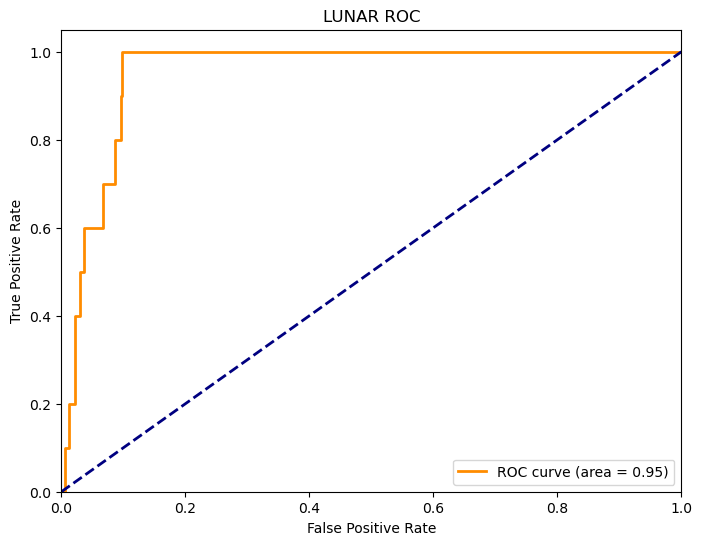

In [17]:
lunar_fpr, lunar_tpr, lunar_thresholds = roc_curve(y, lunar_score)
roc_auc = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lunar_fpr, lunar_tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LUNAR ROC')
plt.legend(loc='lower right')
plt.show()

In [18]:
y_array = y.values.ravel()

score_df = pd.DataFrame({'lunar_score': lunar_score, 'ecod_score': ecod_score, 'y': y_array})
score_df

,lunar_score,ecod_score,y
0,-0.186894,20.595186,0
1,-0.635536,20.886078,0
2,0.311478,26.196613,0
3,0.645933,20.608680,0
4,0.009432,21.759570,0
...,...,...,...
6719,-0.287234,19.790760,0
6720,-0.176903,19.749610,0
6721,-0.022935,24.289305,0
6722,1.147400,23.158911,0


In [19]:
x = score_df[['lunar_score', 'ecod_score']]
y = score_df['y']

In [20]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
y_pred_test = logreg.predict(x_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9978


In [23]:
print('Training set score: {:.4f}'.format(logreg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(x_test, y_test)))

Training set score: 0.9987
Test set score: 0.9978


In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
cv_scores = cross_val_score(logreg, x, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {np.mean(cv_scores)}')


Cross-Validation Scores: [0.99851301 0.99851301 0.99851301 0.99851301 0.9985119 ]
Average Cross-Validation Score: 0.998512789874314


0.9372207327971404


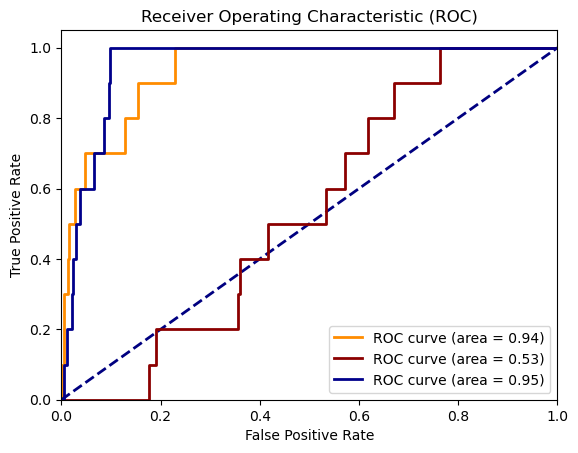

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Get predicted probabilities for the test set
y_prob = logreg.predict_proba(x)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)
roc_auc_ecod = auc(ecod_fpr, ecod_tpr)
roc_auc_lunar = auc(lunar_fpr, lunar_tpr)
print(roc_auc)
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(ecod_fpr, ecod_tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ecod)
plt.plot(lunar_fpr, lunar_tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lunar)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [7]:
lunar_accuracies = []
ecod_accuracies = []
ensemble_accuracies = []
lunar_auc = []
ecod_auc = []
ensemble_auc = []

for i in range (10):
  lunar = LUNAR()
  lunar.fit(df)
  lunar_pred = lunar.predict(df)
  lunar_scores = lunar.decision_function(df)
  lunar_scores1 = lunar.decision_scores_
  lunar_acc = accuracy_score(y,lunar_pred)
  lunar_auc_scores = roc_auc_score(y, lunar_scores1)
  ecod = ECOD()
  ecod.fit(df)
  ecod_pred = ecod.predict(df)
  ecod_scores1 = ecod.decision_function(df)
  ecod_scores = ecod.decision_function(df)
  ecod_acc = accuracy_score(y,ecod_pred)
  ecod_auc_scores = roc_auc_score(y, ecod_scores1)

  y_array = y.values.ravel()

  score_df = pd.DataFrame({'lunar_score': lunar_scores, 'ecod_score': ecod_scores, 'y': y_array})
  score_df

  x = score_df[['lunar_score', 'ecod_score']]
  y = score_df['y']
  
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
  logreg = LogisticRegression(solver='liblinear', random_state=0)
  logreg.fit(x_train, y_train)
  y_pred_test = logreg.predict(x_test)
  
  ensemble_acc = accuracy_score(y_test,y_pred_test)
  y_prob = logreg.predict_proba(x)[:, 1]
  fpr, tpr, thresholds = roc_curve(y, y_prob)
  ensemble_auc_scores = auc(fpr, tpr)
  
  lunar_accuracies.append(lunar_acc)
  ecod_accuracies.append(ecod_acc)
  ensemble_accuracies.append(ensemble_acc)
  lunar_auc.append(lunar_auc_scores)
  ecod_auc.append(ecod_auc_scores)
  ensemble_auc.append(ensemble_auc_scores)


avg_lunar_acc = np.mean(lunar_accuracies)
avg_ecod_acc = np.mean(ecod_accuracies)
avg_ensemble_acc = np.mean(ensemble_accuracies)

avg_lunar_auc = np.mean(lunar_auc)
avg_ecod_auc = np.mean(ecod_auc)
avg_ensemble_auc = np.mean(ensemble_auc)


print(avg_lunar_acc,avg_ecod_acc,avg_ensemble_acc)

print(avg_lunar_auc,avg_ecod_auc,avg_ensemble_auc)

  

0.9009815585960738 0.8984235574063056 0.9977695167286246
0.9538754840631516 0.5342716711349419 0.9296678582067323
